In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.optimize import bisect



In [2]:
#---------- Constants --------#
k = 9e9
c = 1
tolerance = 1e-4

In [3]:
def X(t): return .5 * np.sin(t)
def Y(t): return 0.
def R(t): 
    if t >= 0: #Object is at rest before and at time t
        return np.array([X(t), Y(t), 0.])
    else:
        return np.array([0., 0., 0.])
    
def g(tret, r, t): 
    return tret - t + np.linalg.norm(r - R(tret))/c


Problem 1a

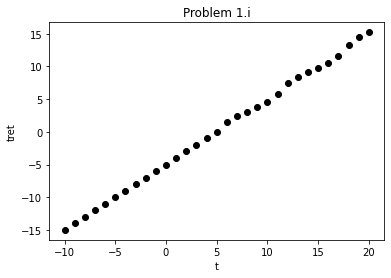

In [35]:
r = np.array([5., 0., 0.])
rmag = np.linalg.norm(r)

for t in np.arange(-10, 21):
    tret = bisect(g, t-2*rmag/c, t, xtol=tolerance, args = (r, t))
    tret = newton(g, tret, args = (r, t))

    plt.plot(t, tret, 'ko')
    plt.title('Problem 1.i')
    plt.xlabel('t')
    plt.ylabel('tret')
    
plt.savefig('p1i.png', dpi = 600)   
plt.show()

Problem 1b

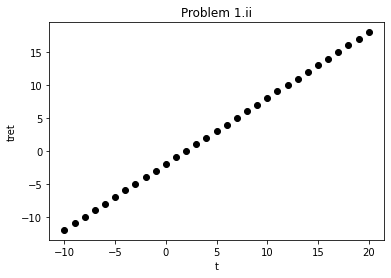

In [36]:
r = np.array([0., 2., 0.])
rmag = np.linalg.norm(r)

for t in np.arange(-10, 21):
    tret = bisect(g, t-2*rmag/c, t, xtol=tolerance, args = (r, t))
    tret = newton(g, tret, args = (r, t))

    plt.plot(t, tret, 'ko')
    plt.title('Problem 1.ii')
    plt.xlabel('t')
    plt.ylabel('tret')
    
plt.savefig('p1ii.png', dpi = 600)  
    
plt.show()

Problem 2a

In [20]:
def V(tret): #Object is at rest before and at time t
    if tret >= 0:
        return np.array([.5 * np.cos(tret), 0., 0.])
    else:
        return np.array([0., 0., 0.])
    
def A(tret): #Object is at rest before and at time t
    if tret >= 0:
        return np.array([.5 * -np.sin(tret), 0., 0.])
    else:
        return np.array([0., 0., 0.])
    
def E(r,t): 
    global c, k, q
    rmag = np.linalg.norm(r)
    
    #Calculate tret
    tret = bisect(g, t-2*rmag/c, t, xtol=tolerance, args = (r, t))
    tret = newton(g, tret, args = (r, t))
    
    rret = (r - R(tret)) #Calculate rret vector
    rret_mag = np.linalg.norm(rret) #Calculate rret magnitude
    uret = c * rret/rret_mag - V(tret) #Calculate uret vector
            
    #Calculate multiplication factor
    mult_factor = k*q*rret_mag/(rret @ uret)**3
    
    #Calculate factor
    first_term = uret*(c**2 - np.linalg.norm(V(tret))**2)
    second_term = np.cross(rret, np.cross(uret, A(tret)))
    

    return mult_factor*(first_term + second_term)


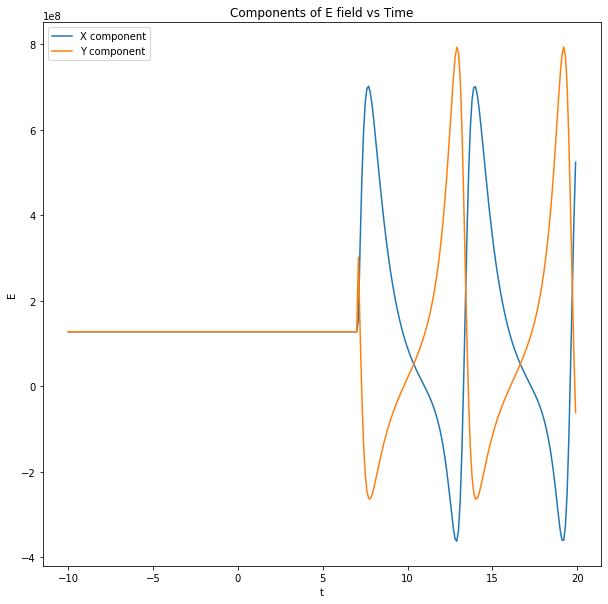

In [46]:
r = np.array([5., 5., 0.])
rmag = np.linalg.norm(r)
q = 1

fig, ax = plt.subplots(1)
fig.set_size_inches(10,10)

xcomplist = []
ycomplist = []
tlist = []

for t in np.arange(-10, 20, .1):
    xcomp, ycomp, zcomp = E(r, t)
    
    tlist.append(t)
    xcomplist.append(xcomp)
    ycomplist.append(ycomp)

ax.set_title('Components of E field vs Time')
ax.set_xlabel('t')
ax.set_ylabel('E')
ax.plot(tlist, xcomplist, label = 'X component')
ax.plot(tlist, ycomplist, label = 'Y component')
ax.legend()
fig.savefig('p2.png', dpi = 600)  


Problem 3a

/Users/christophermorris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


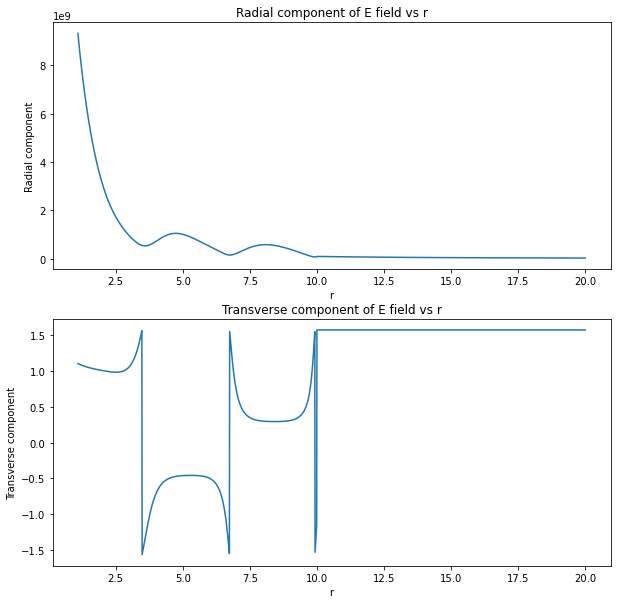

In [42]:
r = np.array([0., 0., 0.])
fig, axes = plt.subplots(2)
fig.set_size_inches(10,10)

radialcomplist = []
transversecomplist = []
rlist = []

for y in np.arange(1.1, 20, .01):
    r[1] = y
    rlist.append(np.linalg.norm(r))

    xcomp, ycomp, zcomp = E(r, 10) 
    radialcomplist.append(np.sqrt(xcomp**2 + ycomp**2 + zcomp**2))
    transversecomplist.append(np.arctan(ycomp/xcomp))
    
axes[0].plot(rlist, radialcomplist)
axes[0].set_title('Radial component of E field vs r')
axes[0].set_xlabel('r')
axes[0].set_ylabel('Radial component')

axes[1].plot(rlist, transversecomplist)
axes[1].set_title('Transverse component of E field vs r')
axes[1].set_xlabel('r')
axes[1].set_ylabel('Transverse component')

fig.savefig('p3i.png', dpi = 600)  



Problem 3b

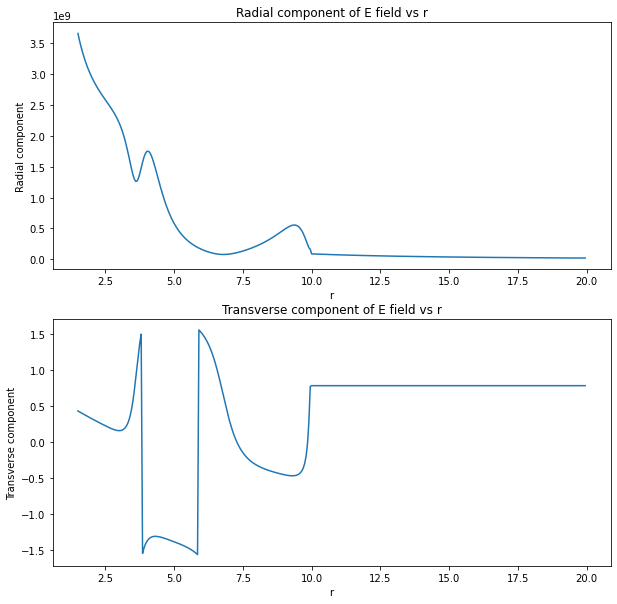

In [43]:
r = np.array([0., 0., 0.])
fig, axes = plt.subplots(2)
fig.set_size_inches(10,10)

radialcomplist = []
transversecomplist = []
rlist = []

for rmag in np.arange(1.5, 20, .05):
    x = rmag / np.sqrt(2)
    r[0] = x
    r[1] = x
    rlist.append(np.linalg.norm(r))

    xcomp, ycomp, zcomp = E(r, 10.)
    
    radialcomplist.append(np.sqrt(xcomp**2 + ycomp**2 + zcomp**2))
    transversecomplist.append(np.arctan(ycomp/xcomp))


    
axes[0].plot(rlist, radialcomplist)
axes[0].set_title('Radial component of E field vs r')
axes[0].set_xlabel('r')
axes[0].set_ylabel('Radial component')

axes[1].plot(rlist, transversecomplist)
axes[1].set_title('Transverse component of E field vs r')
axes[1].set_xlabel('r')
axes[1].set_ylabel('Transverse component')

fig.savefig('p3ii.png', dpi = 600)  



Problem 4

In [30]:

R_MAX = 30 # limit the radius
PHI_0 = 1 # limit the potential
DS = 0.05 # target step size
D_PHI = 1 # limit the step
def compute_field_line(r, t, direction):
    x = [r[0]]
    y = [r[1]]
    
    # Loop until the line is too far from the origin
    # or too close to a charge.
    while np.linalg.norm(r) < R_MAX**2 \
        and np.linalg.norm(r) >= .999:
       
        # Compute the field.
        Efield = E(r, t)
        Efieldmag = np.linalg.norm(Efield)
    
        ds = .05  #Step size     
        dr = direction*ds*Efield/Efieldmag #dr to add to r
        
        ## Second order method below by taking the mean of two steps
        rr = r + dr
        Efieldmid = E(rr, t)
        Emean = (Efield + Efieldmid) * .5
        Emeanmag = np.linalg.norm(Emean)
        
        # New dr based on Second order method
        dr = direction*ds*Emean/Emeanmag
        
        r += dr #update r
        
        x.append(r[0])
        y.append(r[1])

    return x, y


def plotfullfieldlines(t, ntheta, axes, index):

    for n in range(ntheta): #initiates the field lines are ntheta equil positions in a circle
        theta = 2 * np.pi * n / ntheta
        rinitial = np.array([np.cos(theta), np.sin(theta), 0])
        
        xfieldline, yfieldline = compute_field_line(rinitial, t, 1)
        axes[index].plot(xfieldline, yfieldline, 'k-')

        xfieldline, yfieldline = compute_field_line(rinitial, t, -1)
        plt.plot(xfieldline, yfieldline, 'k-')



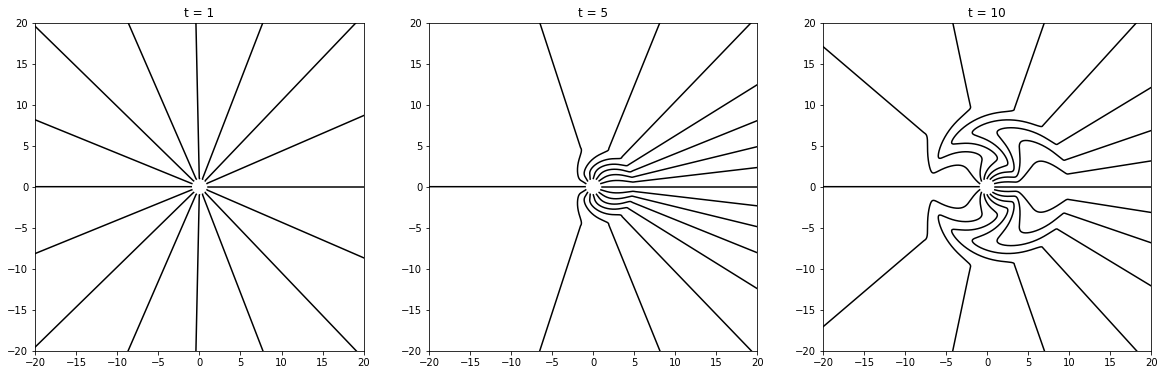

In [45]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(20,20)

for tindex, tinput in enumerate([1,5,10]):
    axes[tindex].set_xlim(-20, 20)
    axes[tindex].set_ylim(-20, 20)
    axes[tindex].set_aspect('equal')
    axes[tindex].set_title('t = {}'.format(tinput))
    plotfullfieldlines(tinput, 16, axes, tindex)
    
fig.savefig('p4.png', dpi = 600)  

